In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

wine = 'wine.data'
ruou = pd.read_csv(wine, sep=',', decimal='.', header = None, names =['Class', 'Alcohol', 'Malic Acid', 'Ash', 'Alcalinity Of Ash', 'Magnesium', 'Total Phenols', 'Flavanoids', 'None-flavanoid Phenols', 'Proanthocyanins', 'Colour Intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline'])
ruou.shape

(178, 14)

In [2]:
ruou.head()

,Class,Alcohol,Malic Acid,Ash,Alcalinity Of Ash,Magnesium,Total Phenols,Flavanoids,None-flavanoid Phenols,Proanthocyanins,Colour Intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
ruou_copy = ruou.copy()
ruou_copy.shape

(178, 14)

In [4]:
def type_check(typ, col):         #Function to check data type and report any data with inappropriate type
    count = 0
    for i in ruou_copy[col]:
        check = type(i) == typ
        if check == False:
            count = count + 1
            print 'Value with inappropriate data type: ' + str(type(i))
    return str(count) + ' data with inappropriate data type in ' + col

def range_check(x, y, col):        #Function for sanity check which check and report any impossible and invalid data
    count =0
    for i in ruou_copy[col]:
        check = x <= i <=y
        if check == False and str(i) != 'nan': 
            count = count + 1
            print 'Invalid value: ' + str(i)
    return str(count) + ' invalid value(s)'

In [5]:
ruou_copy.isnull().sum()

Class                           0
Alcohol                         0
Malic Acid                      0
Ash                             0
Alcalinity Of Ash               0
Magnesium                       0
Total Phenols                   0
Flavanoids                      0
None-flavanoid Phenols          0
Proanthocyanins                 0
Colour Intensity                0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [6]:
ruou_copy.dtypes

Class                             int64
Alcohol                         float64
Malic Acid                      float64
Ash                             float64
Alcalinity Of Ash               float64
Magnesium                         int64
Total Phenols                   float64
Flavanoids                      float64
None-flavanoid Phenols          float64
Proanthocyanins                 float64
Colour Intensity                float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
dtype: object

In [7]:
for i in ruou_copy.drop(columns = ['Class', 'Magnesium', 'Proline']):     #Check columns with float data type
    print type_check(float, i)

0 data with inappropriate data type in Alcohol
0 data with inappropriate data type in Malic Acid
0 data with inappropriate data type in Ash
0 data with inappropriate data type in Alcalinity Of Ash
0 data with inappropriate data type in Total Phenols
0 data with inappropriate data type in Flavanoids
0 data with inappropriate data type in None-flavanoid Phenols
0 data with inappropriate data type in Proanthocyanins
0 data with inappropriate data type in Colour Intensity
0 data with inappropriate data type in Hue
0 data with inappropriate data type in OD280/OD315 of diluted wines


In [8]:
for i in ruou_copy.filter(['Class', 'Magnesium', 'Proline']):        #Check columns with long data type
    print type_check(long, i)

0 data with inappropriate data type in Class
0 data with inappropriate data type in Magnesium
0 data with inappropriate data type in Proline


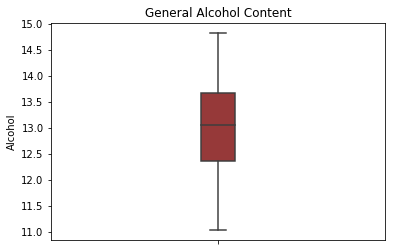

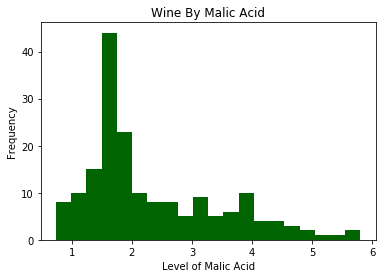

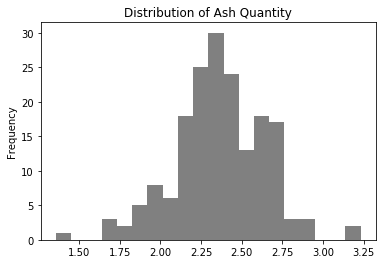

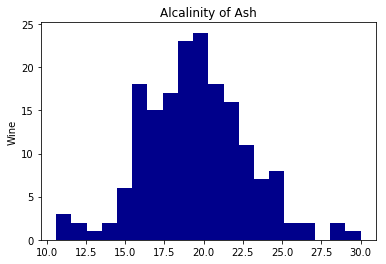

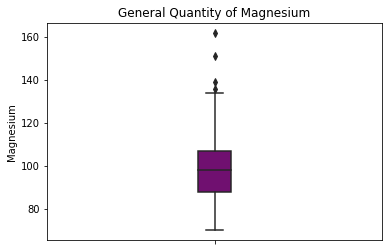

In [9]:
#Boxplot showing amount of alcohol
alcolbox = sbn.boxplot(ruou_copy['Alcohol'], orient = 'v', width = 0.1, color = 'brown')
plt.title('General Alcohol Content')
plt.show(alcolbox)

#Amount of wine products by malic acid 
acidhist = ruou_copy['Malic Acid'].plot(kind = 'hist', bins = 20, color = 'darkgreen')
plt.title('Wine By Malic Acid')
plt.xlabel('Level of Malic Acid')
plt.show(acidhist)

# Histogram of ash distribution
ashist = ruou_copy['Ash'].plot(kind = 'hist', bins = 20, color = 'grey')
plt.title('Distribution of Ash Quantity')
plt.show(ashist)

#Histogram showing Alcalinity of Ash
alcalashist = ruou_copy['Alcalinity Of Ash'].plot(kind = 'hist', bins = 20, color = 'darkblue')
plt.title('Alcalinity of Ash')
plt.ylabel('Wine')
plt.show(alcalashist)

#Boxplot of Magnesium quantity 
Mgbox = sbn.boxplot(ruou_copy['Magnesium'], orient = 'v', width = 0.1, color = 'purple')
plt.title('General Quantity of Magnesium')
plt.show(Mgbox)

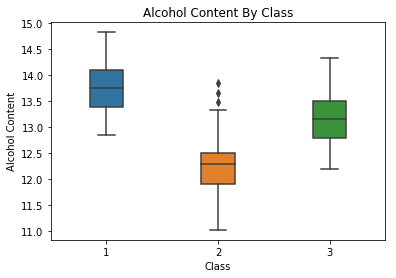

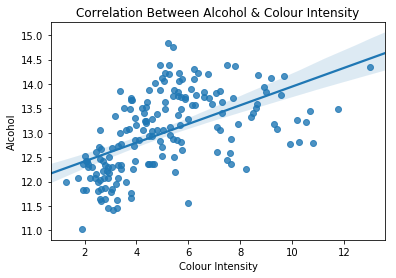

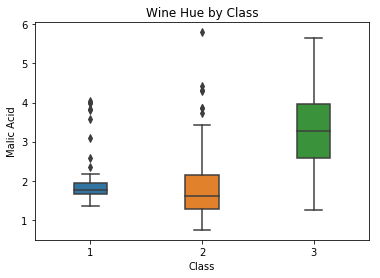

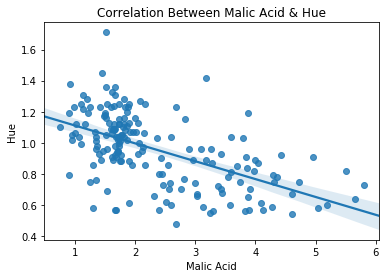

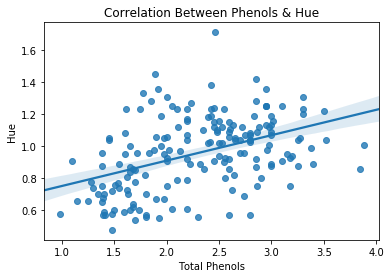

In [10]:
# Boxplot of alcohol content by wine cultivars
alcol_class = sbn.boxplot(x = ruou_copy['Class'], y = ruou_copy['Alcohol'], orient = 'v', width = 0.3)
plt.title('Alcohol Content By Class')
plt.ylabel('Alcohol Content')
plt.show(alcol_class)

# Boxplot of phenols content by wine cultivars
alcolour = sbn.regplot(x = 'Colour Intensity', y = 'Alcohol', data = ruou_copy)
plt.title('Correlation Between Alcohol & Colour Intensity')
plt.show(alcolour)

#Boxplot showing Hue by cultivars
hue_class = sbn.boxplot(x = ruou_copy['Class'], y = ruou_copy['Malic Acid'], orient = 'v', width = 0.3)
plt.title('Wine Hue by Class')
plt.show(hue_class)

# Correlation between Phenols and Color Intensity
acid_color = sbn.regplot(x = 'Malic Acid', y = 'Hue', data = ruou_copy)
plt.title('Correlation Between Malic Acid & Hue')
plt.show(acid_color)

# Phenols content and hue correlation
phnl_hue = sbn.regplot(x = 'Total Phenols', y = 'Hue', data = ruou_copy)
plt.title('Correlation Between Phenols & Hue')
plt.show(phnl_hue)

In [11]:
ruou_copy.head(190)

,Class,Alcohol,Malic Acid,Ash,Alcalinity Of Ash,Magnesium,Total Phenols,Flavanoids,None-flavanoid Phenols,Proanthocyanins,Colour Intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045
